In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "2018_P1.csv"  # Update file name if needed

# Load the CSV and force correct encoding
df = pd.read_csv(file_path)

# Print all column names
print("Columns in DataFrame:", df.columns.tolist())

Columns in DataFrame: ['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)']


In [ ]:
# Check initial data info
print("Initial data shape:", df.shape)
print("\nMissing values in each column:")
print(df.isnull().sum())

Initial data shape: (8760, 25)

Missing values in each column:
Timestamp                 0
PM2.5 (µg/m³)           915
PM10 (µg/m³)            918
NO (µg/m³)             1809
NO2 (µg/m³)            1814
NOx (ppb)              1840
NH3 (µg/m³)            1844
SO2 (µg/m³)            1209
CO (mg/m³)             1170
Ozone (µg/m³)          2300
Benzene (µg/m³)        1093
Toluene (µg/m³)        1082
Xylene (µg/m³)         8760
O Xylene (µg/m³)       8760
Eth-Benzene (µg/m³)    4691
MP-Xylene (µg/m³)      3625
AT (°C)                8760
RH (%)                  825
WS (m/s)               1014
WD (deg)               1010
RF (mm)                8760
TOT-RF (mm)            8760
SR (W/mt2)              916
BP (mmHg)               821
VWS (m/s)               813
dtype: int64


<Axes: >

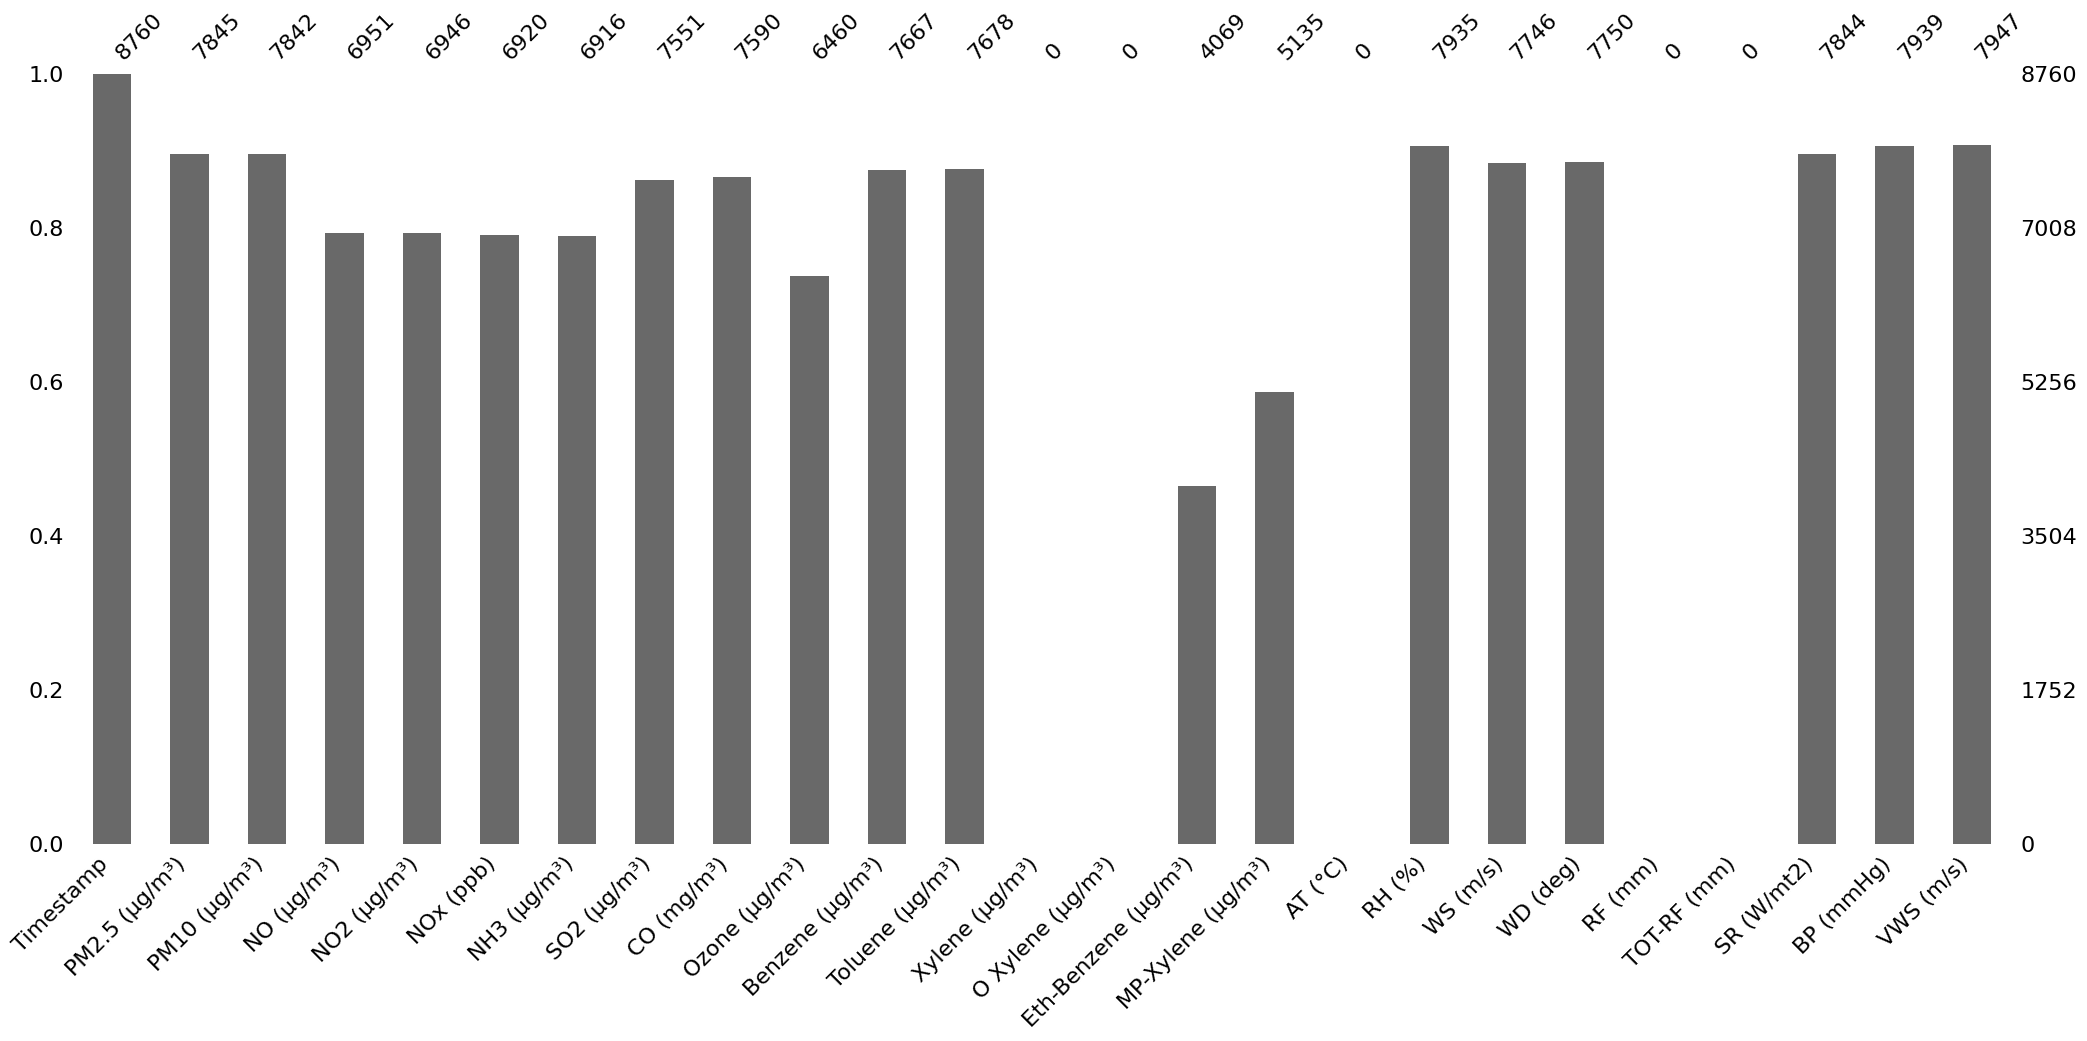

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
Timestamp,0
PM2.5 (µg/m³),915
PM10 (µg/m³),918
NO (µg/m³),1809
NO2 (µg/m³),1814
NOx (ppb),1840
NH3 (µg/m³),1844
SO2 (µg/m³),1209
CO (mg/m³),1170
Ozone (µg/m³),2300


In [ ]:
# Identify and remove completely empty columns
columns_to_keep =  ['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)',
                  'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)',
                  'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']

# Select columns
df1 = df[columns_to_keep].copy()
print("\nNew shape:", df1.shape)


New shape: (8760, 14)


In [ ]:
df1["Timestamp"] = pd.to_datetime(df1["Timestamp"], errors='coerce')

In [ ]:
# Convert Timestamp to datetime and extract month
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df1['Month'] = df1['Timestamp'].dt.month

In [ ]:
# Fill missing values with monthly means
print("Filling missing values with monthly means...")
for column in df1.columns:
    if column not in ['Timestamp', 'Month'] and df1[column].isnull().any():
        # Calculate monthly means
        monthly_means = df1.groupby('Month')[column].transform('mean')
        # Count missing values before
        missing_before = df1[column].isnull().sum()
        # Fill with monthly means
        df1[column] = df1[column].fillna(monthly_means)
        # Count remaining missing values
        missing_after = df1[column].isnull().sum()
        print(f"{column}: Filled {missing_before - missing_after} values with monthly means, {missing_after} still missing")

Filling missing values with monthly means...
PM2.5 (µg/m³): Filled 282 values with monthly means, 633 still missing
PM10 (µg/m³): Filled 279 values with monthly means, 639 still missing
NO2 (µg/m³): Filled 571 values with monthly means, 1243 still missing
NH3 (µg/m³): Filled 579 values with monthly means, 1265 still missing
SO2 (µg/m³): Filled 392 values with monthly means, 817 still missing
CO (mg/m³): Filled 375 values with monthly means, 795 still missing
Ozone (µg/m³): Filled 869 values with monthly means, 1431 still missing
AT (°C): Filled 0 values with monthly means, 8760 still missing
RH (%): Filled 245 values with monthly means, 580 still missing
WS (m/s): Filled 263 values with monthly means, 751 still missing
WD (deg): Filled 260 values with monthly means, 750 still missing
SR (W/mt2): Filled 248 values with monthly means, 668 still missing
BP (mmHg): Filled 245 values with monthly means, 576 still missing


In [ ]:
# Fill remaining missing values with yearly means
print("Filling remaining missing values with yearly means...")
for column in df1.columns:
    if column not in ['Timestamp', 'Month'] and df1[column].isnull().any():
        # Calculate yearly mean
        yearly_mean = df1[column].mean()
        # Count missing values before
        missing_before = df1[column].isnull().sum()
        # Fill with yearly mean
        df1[column] = df1[column].fillna(yearly_mean)
        print(f"{column}: Filled {missing_before} remaining values with yearly mean {yearly_mean:.2f}")

Filling remaining missing values with yearly means...
PM2.5 (µg/m³): Filled 633 remaining values with yearly mean 75.34
PM10 (µg/m³): Filled 639 remaining values with yearly mean 148.00
NO2 (µg/m³): Filled 1243 remaining values with yearly mean 42.34
NH3 (µg/m³): Filled 1265 remaining values with yearly mean 16.66
SO2 (µg/m³): Filled 817 remaining values with yearly mean 11.78
CO (mg/m³): Filled 795 remaining values with yearly mean 0.94
Ozone (µg/m³): Filled 1431 remaining values with yearly mean 42.56
AT (°C): Filled 8760 remaining values with yearly mean nan
RH (%): Filled 580 remaining values with yearly mean 40.81
WS (m/s): Filled 751 remaining values with yearly mean 0.88
WD (deg): Filled 750 remaining values with yearly mean 162.78
SR (W/mt2): Filled 668 remaining values with yearly mean 188.50
BP (mmHg): Filled 576 remaining values with yearly mean 757.08


In [ ]:
# Remove the temporary Month column
df1 = df1.drop(columns=['Month'])

# Check final missing values
print("\nRemaining missing values:")
print(df1.isnull().sum())


Remaining missing values:
Timestamp        5304
PM2.5 (µg/m³)       0
PM10 (µg/m³)        0
NO2 (µg/m³)         0
NH3 (µg/m³)         0
SO2 (µg/m³)         0
CO (mg/m³)          0
Ozone (µg/m³)       0
AT (°C)          8760
RH (%)              0
WS (m/s)            0
WD (deg)            0
SR (W/mt2)          0
BP (mmHg)           0
dtype: int64


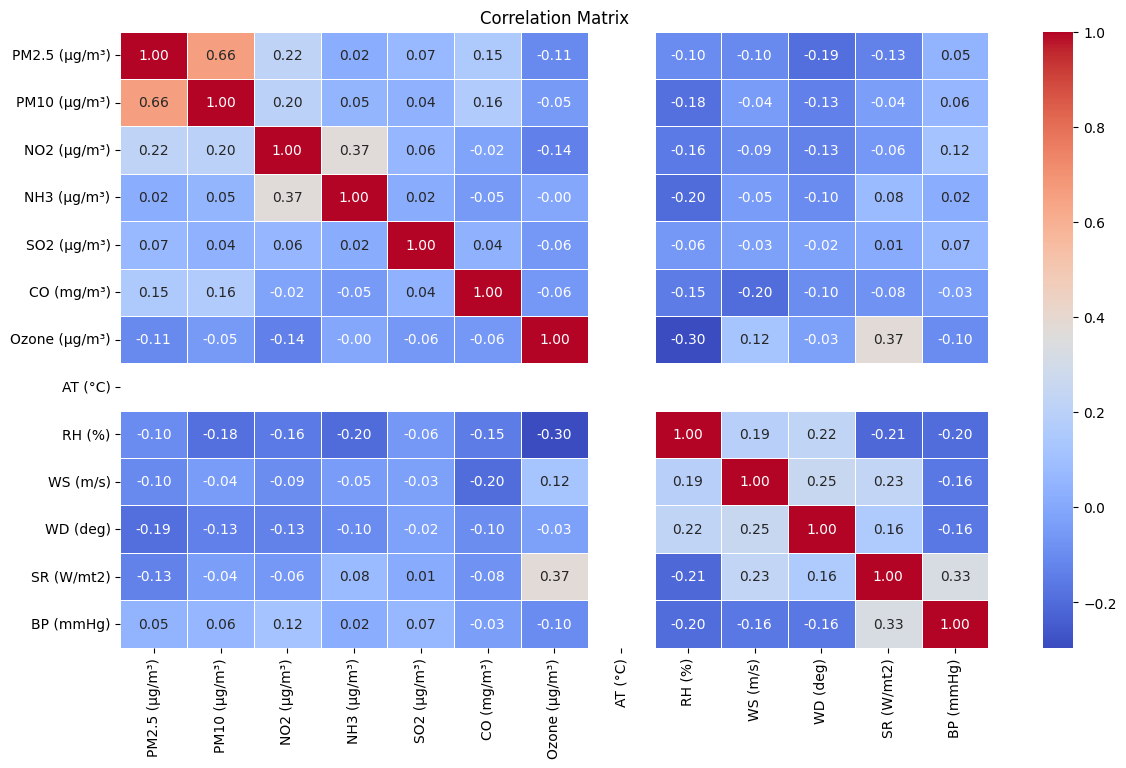

In [ ]:
# Create correlation matrix
numeric_df = df1.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Show top correlations
print("Top 10 Strongest Correlations:")
correlations = correlation_matrix.unstack()
sorted_correlations = correlations[correlations != 1.0].abs().sort_values(ascending=False)
print(sorted_correlations[:10])

Top 10 Strongest Correlations:
PM2.5 (µg/m³)  PM10 (µg/m³)     0.657795
PM10 (µg/m³)   PM2.5 (µg/m³)    0.657795
SR (W/mt2)     Ozone (µg/m³)    0.374515
Ozone (µg/m³)  SR (W/mt2)       0.374515
NH3 (µg/m³)    NO2 (µg/m³)      0.370196
NO2 (µg/m³)    NH3 (µg/m³)      0.370196
SR (W/mt2)     BP (mmHg)        0.325891
BP (mmHg)      SR (W/mt2)       0.325891
RH (%)         Ozone (µg/m³)    0.295140
Ozone (µg/m³)  RH (%)           0.295140
dtype: float64
